In [1]:
# load required libararies

import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import urllib.request
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
#Get data from European Centre for Disease Prevention and Control
#last updated dataset
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-07-01.xlsx'

In [3]:
urllib.request.urlretrieve(url, "covid_state_june.xlsx")

('covid_state_june.xlsx', <http.client.HTTPMessage at 0x27c325b8b08>)

In [4]:
# Load dataset
covid19_df = pd.read_excel('covid_state_june.xlsx')

In [5]:
covid19_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-07-01,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-30,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia


In [6]:
covid19_df['dateRep'] = pd.to_datetime(covid19_df['dateRep'],
                                       format='%d/%m/%Y')

In [7]:
covid19_df.isna().sum()[covid19_df.isna().sum() > 0]

geoId                   109
countryterritoryCode     64
popData2019              64
dtype: int64

In [8]:
covid19_df.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2019                       float64
continentExp                       object
dtype: object

In [9]:
covid19_df.rename(columns={
    'dateRep': 'Date',
    'countriesAndTerritories': 'Country',
    'cases': 'Confirmed',
    'deaths': 'Deaths',
    'continentExp': 'Continent'
},
                  inplace=True)

In [10]:
covid19_df.to_csv('june_updated.csv')

In [11]:
ndf = pd.read_csv('june_updated.csv', parse_dates=['Date'], index_col='Date')

In [12]:
ndf.sample()

,Unnamed: 0,day,month,year,Confirmed,Deaths,Country,geoId,countryterritoryCode,popData2019,Continent
Date,,,,,,,,,,,
2020-06-03,17745,3,6,2020,0,0,New_Caledonia,NC,NCL,282757.0,Oceania


In [13]:
ndf = ndf.drop([
    'Unnamed: 0', 'geoId', 'day', 'month', 'year', 'countryterritoryCode',
    'popData2019'
],
               axis=1)

In [14]:
ndf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-07-01,279,13,Afghanistan,Asia
2020-06-30,271,12,Afghanistan,Asia
2020-06-29,351,18,Afghanistan,Asia
2020-06-28,165,20,Afghanistan,Asia
2020-06-27,276,8,Afghanistan,Asia


In [15]:
# Rename Countries
ndf['Country'] = ndf['Country'].str.replace('Antigua_and_Barbuda',
                                            'Antigua & Barbuda')
ndf['Country'] = ndf['Country'].str.replace('United_Kingdom', 'UK')
ndf['Country'] = ndf['Country'].str.replace('United_States_of_America', 'US')
ndf['Country'] = ndf['Country'].str.replace('United_Arab_Emirates', 'Emirates')
ndf['Country'] = ndf['Country'].str.replace('Holy_See', 'Vatican')
ndf['Country'] = ndf['Country'].str.replace('Bosnia_and_Herzegovina',
                                            'Bosnia & Herzegovina')
ndf['Country'] = ndf['Country'].str.replace('Brunei_Darussalam', 'Brunei')
ndf['Country'] = ndf['Country'].str.replace('Burkina_Faso', 'Burkina Faso')
ndf['Country'] = ndf['Country'].str.replace('CANADA', 'Canada')
ndf['Country'] = ndf['Country'].str.replace(
    'Cases_on_an_international_conveyance_Japan', 'The Diamond Princess')
ndf['Country'] = ndf['Country'].str.replace('Central_African_Republic',
                                            'Central African Rep.')
ndf['Country'] = ndf['Country'].str.replace('Costa_Rica', 'Costa Rica')
ndf['Country'] = ndf['Country'].str.replace("Cote_dIvoire", "Cote d'ivoire")
ndf['Country'] = ndf['Country'].str.replace('Czech_Republic', 'Czech Rep.')
ndf['Country'] = ndf['Country'].str.replace('Democratic_Republic_of_the_Congo',
                                            'Congo-Kinshasa')
ndf['Country'] = ndf['Country'].str.replace('Equatorial_Guinea', 'Guinea')
ndf['Country'] = ndf['Country'].str.replace('Eswatini', 'Eswatini-Swaziland')
ndf['Country'] = ndf['Country'].str.replace('New_Zealand', 'New Zealand')
ndf['Country'] = ndf['Country'].str.replace('North_Macedonia', 'Macedonia')
ndf['Country'] = ndf['Country'].str.replace('Saint_Lucia', 'Saint Lucia')
ndf['Country'] = ndf['Country'].str.replace('Saint_Vincent_and_the_Grenadines',
                                            'Saint Vincent')
ndf['Country'] = ndf['Country'].str.replace('San_Marino', 'San Marino')
ndf['Country'] = ndf['Country'].str.replace('Saudi_Arabia', 'Saudi Arabia')
ndf['Country'] = ndf['Country'].str.replace('South_Africa', 'South Africa')
ndf['Country'] = ndf['Country'].str.replace('South_Korea', 'South Korea')
ndf['Country'] = ndf['Country'].str.replace('Sri_Lanka', 'Sri Lanka')
ndf['Country'] = ndf['Country'].str.replace('Trinidad_and_Tobago',
                                            'Trinidad & Tobago')
ndf['Country'] = ndf['Country'].str.replace('United_Republic_of_Tanzania',
                                            'Tanzania')
ndf['Country'] = ndf['Country'].str.replace('Dominican_Republic',
                                            'Dominican Rep.')

In [16]:
# Fatalities By Country
deaths_by_country = ndf.groupby(
    ['Country'])['Deaths'].sum().to_frame(name='Deaths').reset_index()
deaths_by_country.columns = ['Country', 'Deaths']
deaths_by_country.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_country.head(50)

,Country,Deaths
196,US,127410
27,Brazil,59594
195,UK,43730
97,Italy,34767
69,France,29843
177,Spain,28355
125,Mexico,27769
90,India,17400
92,Iran,10817
18,Belgium,9754


In [17]:
# Fatalities By Continent
deaths_by_continent = ndf.groupby(
    ['Continent'])['Deaths'].sum().to_frame(name='Deaths').reset_index()
deaths_by_continent.columns = ['Continent', 'Deaths']
deaths_by_continent.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_continent.head()

,Continent,Deaths
1,America,252485
3,Europe,191962
2,Asia,56303
0,Africa,10147
4,Oceania,133


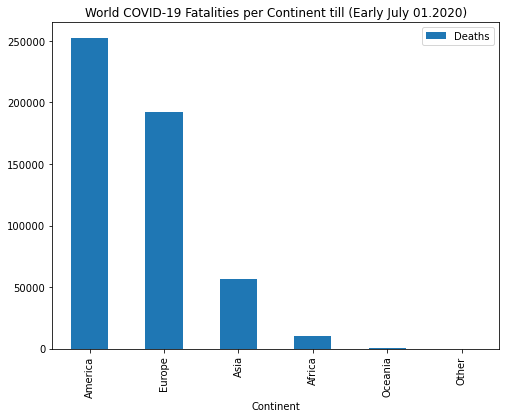

In [18]:
deaths_by_continent.plot(kind='bar',
                         x='Continent',
                         y='Deaths',
                         legend=True,
                         figsize=(8, 6))
plt.title("World COVID-19 Fatalities per Continent till (Early July 01.2020)")
plt.savefig('wcov19contfatex')

In [19]:
# Cases By Country
confirmed_by_country = ndf.groupby(
    ['Country'])['Confirmed'].sum().to_frame(name='Confirmed').reset_index()
confirmed_by_country.columns = ['Country', 'Confirmed']
confirmed_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_country.head(50)

,Country,Confirmed
196,US,2634432
27,Brazil,1402041
157,Russia,647849
90,India,585493
195,UK,312654
150,Peru,285213
40,Chile,279393
177,Spain,249271
97,Italy,240578
92,Iran,227662


In [20]:
# Cases By Continent
confirmed_by_continent = ndf.groupby(
    ['Continent'])['Confirmed'].sum().to_frame(name='Confirmed').reset_index()
confirmed_by_continent.columns = ['Continent', 'Confirmed']
confirmed_by_continent.sort_values(by='Confirmed',
                                   ascending=False,
                                   inplace=True)
confirmed_by_continent.head()

,Continent,Confirmed
1,America,5327057
3,Europe,2442700
2,Asia,2261403
0,Africa,405076
4,Oceania,9421


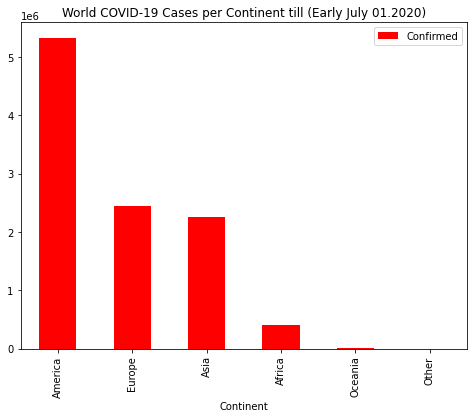

In [21]:
confirmed_by_continent.plot(kind='bar',
                            color='red',
                            x='Continent',
                            y='Confirmed',
                            legend=True,
                            figsize=(8, 6))
plt.title("World COVID-19 Cases per Continent till (Early July 01.2020)")
plt.savefig('wcov19contcasesx')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C32D72E88>,
      dtype=object)

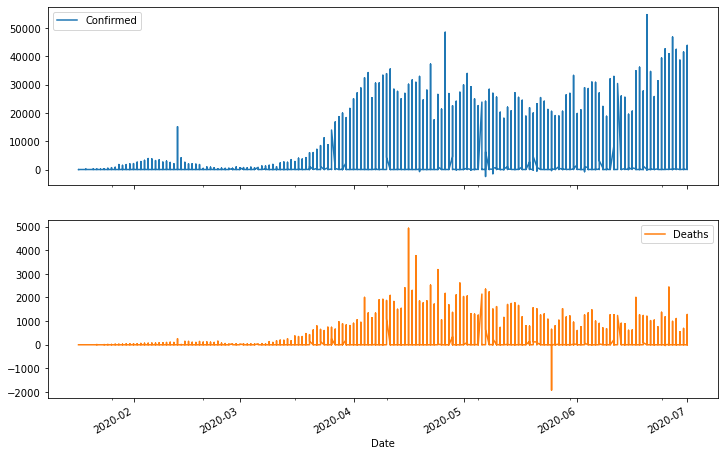

In [22]:
# Plot daily cases worldwide
ndf.loc['2020-01-17':'2020-07-01'][['Confirmed',
                                    'Deaths']].plot(subplots=True,
                                                    kind='line',
                                                    figsize=(12, 8))

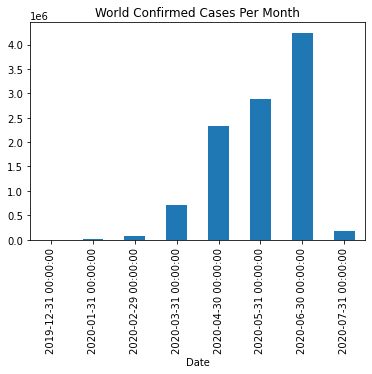

In [23]:
# Plot Confirmed Cases Montly
ndf['Confirmed'].resample('M').sum().plot(
    kind='bar', title='World Confirmed Cases Per Month')
plt.savefig('wcov19casespermonthx')

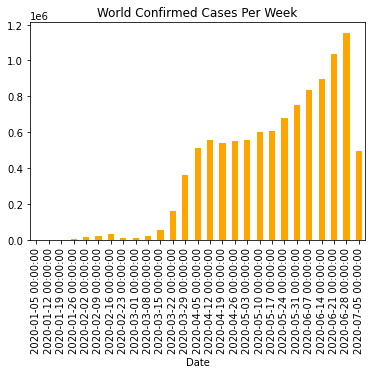

In [24]:
# Plot Confirmed Cases Weekly
ndf['Confirmed'].resample('W').sum().plot(
    kind='bar', color='orange', title='World Confirmed Cases Per Week')
plt.savefig('wcov19casesperweekx')

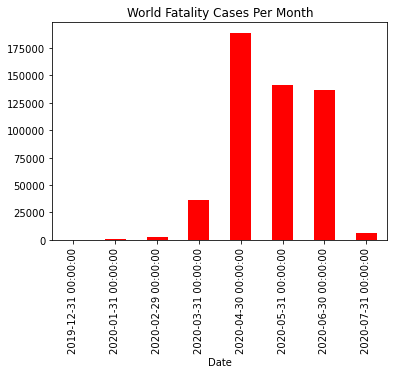

In [25]:
# Plot Fatalities Montly
ndf['Deaths'].resample('M').sum().plot(kind='bar',
                                       color='red',
                                       title='World Fatality Cases Per Month')
plt.savefig('wcov19fatpermonthx')

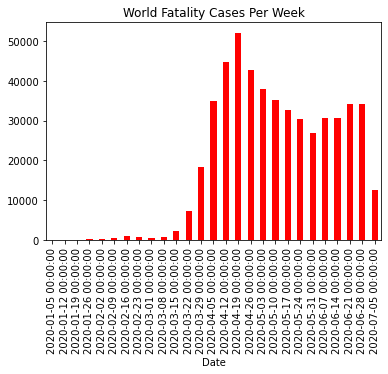

In [26]:
# Plot Fatalities Weekly
ndf['Deaths'].resample('W').sum().plot(kind='bar',
                                       color='red',
                                       title='World Fatality Cases Per Week')
plt.savefig('wcov19fatperweekx')

In [27]:
#largest values/daily records World
ndf.nlargest(30, 'Confirmed')

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-20,54771,1206,Brazil,America
2020-04-26,48529,2172,US,America
2020-06-27,46860,990,Brazil,America
2020-06-27,45527,623,US,America
2020-07-01,43880,1270,US,America
2020-06-25,42725,1185,Brazil,America
2020-06-28,42486,500,US,America
2020-06-30,41556,336,US,America
2020-06-26,40949,2437,US,America


In [28]:
# visualization of some countries in the world

# CHINA STATE
df_cn = ndf[ndf['Country'] == 'China'].reset_index()
# ITALY STATE
df_it = ndf[ndf['Country'] == 'Italy'].reset_index()
# IRAN STATE
df_ir = ndf[ndf['Country'] == 'Iran'].reset_index()
# SPAIN STATE
df_sp = ndf[ndf['Country'] == 'Spain'].reset_index()
# FRANCE STATE
df_fr = ndf[ndf['Country'] == 'France'].reset_index()
# SOUTH KOREA STATE
df_skr = ndf[ndf['Country'] == 'South Korea'].reset_index()
# Germany STATE
df_gr = ndf[ndf['Country'] == 'Germany'].reset_index()
# USA STATE
df_us = ndf[ndf['Country'] == 'US'].reset_index()
# UK STATE
df_uk = ndf[ndf['Country'] == 'UK'].reset_index()
# NL STATE
df_nl = ndf[ndf['Country'] == 'Netherlands'].reset_index()
# SWISS STATE
df_sw = ndf[ndf['Country'] == 'Switzerland'].reset_index()
# Japan STATE
df_jp = ndf[ndf['Country'] == 'Japan'].reset_index()
# Egypt STATE
df_eg = ndf[ndf['Country'] == 'Egypt'].reset_index()
# Israel STATE
df_il = ndf[ndf['Country'] == 'Israel'].reset_index()
# Turkey STATE
df_tr = ndf[ndf['Country'] == 'Turkey'].reset_index()
# Iraq STATE
df_iq = ndf[ndf['Country'] == 'Iraq'].reset_index()
# Qatar STATE
df_qr = ndf[ndf['Country'] == 'Qatar'].reset_index()
# Bahrain STATE
df_bn = ndf[ndf['Country'] == 'Bahrain'].reset_index()
# Brazil STATE
df_br = ndf[ndf['Country'] == 'Brazil'].reset_index()
# Russia STATE
df_ru = ndf[ndf['Country'] == 'Russia'].reset_index()
# India STATE
df_in = ndf[ndf['Country'] == 'India'].reset_index()
# Belgium STATE
df_bgm = ndf[ndf['Country'] == 'Belgium'].reset_index()
# Mexico STATE
df_mx = ndf[ndf['Country'] == 'Mexico'].reset_index()
# South Africa STATE
df_sa = ndf[ndf['Country'] == 'South Africa'].reset_index()
# KSA STATE
df_ksa = ndf[ndf['Country'] == 'Saudi Arabia'].reset_index()
# Norway STATE
df_no = ndf[ndf['Country'] == 'Norway'].reset_index()
# Australia STATE
df_au = ndf[ndf['Country'] == 'Australia'].reset_index()
# Pakistan STATE
df_pk = ndf[ndf['Country'] == 'Pakistan'].reset_index()
# Indonesia STATE
df_inesia = ndf[ndf['Country'] == 'Indonesia'].reset_index()
# Sweden STATE
df_swd = ndf[ndf['Country'] == 'Sweden'].reset_index()
# Peru STATE
df_pu = ndf[ndf['Country'] == 'Peru'].reset_index()
# Chile State
df_cl = ndf[ndf['Country'] == 'Chile'].reset_index()

# filter down on dates
df_cn = df_cn[df_cn['Date'] >= ('2020-01-17')]
df_it = df_it[df_it['Date'] >= ('2020-01-17')]
df_ir = df_ir[df_ir['Date'] >= ('2020-01-17')]
df_sp = df_sp[df_sp['Date'] >= ('2020-01-17')]
df_fr = df_fr[df_fr['Date'] >= ('2020-01-17')]
df_skr = df_skr[df_skr['Date'] >= ('2020-01-17')]
df_gr = df_gr[df_gr['Date'] >= ('2020-01-17')]
df_us = df_us[df_us['Date'] >= ('2020-01-17')]
df_uk = df_uk[df_uk['Date'] >= ('2020-01-17')]
df_nl = df_nl[df_nl['Date'] >= ('2020-01-17')]
df_sw = df_sw[df_sw['Date'] >= ('2020-01-17')]
df_jp = df_jp[df_jp['Date'] >= ('2020-01-17')]
df_eg = df_eg[df_eg['Date'] >= ('2020-01-17')]
df_il = df_il[df_il['Date'] >= ('2020-01-17')]
df_tr = df_tr[df_tr['Date'] >= ('2020-01-17')]
df_iq = df_iq[df_iq['Date'] >= ('2020-01-17')]
df_qr = df_qr[df_qr['Date'] >= ('2020-01-17')]
df_bn = df_bn[df_bn['Date'] >= ('2020-01-17')]
df_br = df_br[df_br['Date'] >= ('2020-01-17')]
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]
df_in = df_in[df_in['Date'] >= ('2020-01-17')]
df_bgm = df_bgm[df_bgm['Date'] >= ('2020-01-17')]
df_mx = df_mx[df_mx['Date'] >= ('2020-01-17')]
df_sa = df_sa[df_sa['Date'] >= ('2020-01-17')]
df_ksa = df_ksa[df_ksa['Date'] >= ('2020-01-17')]
df_no = df_no[df_no['Date'] >= ('2020-01-17')]
df_au = df_au[df_au['Date'] >= ('2020-01-17')]
df_pk = df_pk[df_pk['Date'] >= ('2020-01-17')]
df_inesia = df_inesia[df_inesia['Date'] >= ('2020-01-17')]
df_swd = df_swd[df_swd['Date'] >= ('2020-01-17')]
df_pu = df_pu[df_pu['Date'] >= ('2020-01-17')]
df_cl = df_cl[df_cl['Date'] >= ('2020-01-17')]

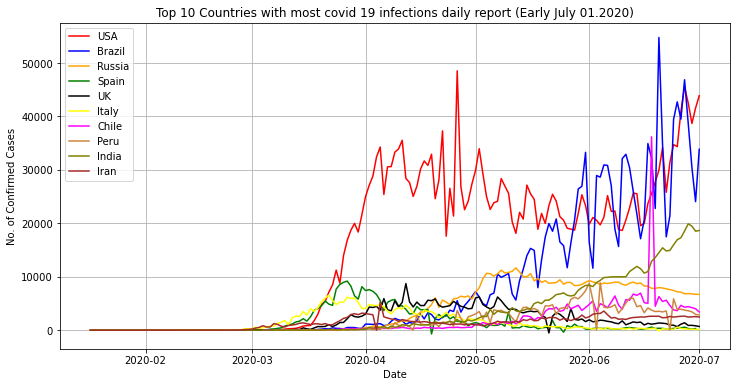

In [29]:
# plotting Top 10 Countries with most covid 19 infections

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_us['Date'], df_us['Confirmed'], color='red')
ax.plot(df_br['Date'], df_br['Confirmed'], color='blue')
ax.plot(df_ru['Date'], df_ru['Confirmed'], color='orange')
ax.plot(df_sp['Date'], df_sp['Confirmed'], color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'], color='black')
ax.plot(df_it['Date'], df_it['Confirmed'], color='yellow')
ax.plot(df_cl['Date'], df_cl['Confirmed'], color='magenta')
ax.plot(df_pu['Date'], df_pu['Confirmed'], color='peru')
ax.plot(df_in['Date'], df_in['Confirmed'], color='olive')
ax.plot(df_ir['Date'], df_ir['Confirmed'], color='brown')

ax.set(
    xlabel='Date',
    ylabel='No. of Confirmed Cases',
    title=
    'Top 10 Countries with most covid 19 infections daily report (Early July 01.2020)'
)
ax.legend([
    'USA', 'Brazil', 'Russia', 'Spain', 'UK', 'Italy', 'Chile', 'Peru',
    'India', 'Iran'
])
ax.grid()
plt.savefig('topcovidstatex')

In [30]:
# Covid-19 World Statistics
wcc = ndf['Confirmed'].sum()  # World confirmed cases
wfc = ndf['Deaths'].sum()  # World fatalities
fatality_rate = wfc / (wcc + wfc) * 100  # World fatality rate

In [31]:
print({
    'World confirmed cases': wcc,
    'World fatalities': wfc,
    'World fatality rate': fatality_rate
})

{'World confirmed cases': 10446353, 'World fatalities': 511037, 'World fatality rate': 4.663856995142091}


In [32]:
#Egypt

df_eg
egcon = df_eg['Confirmed'].sum()  # Confirmed cases
egdt = df_eg['Deaths'].sum()  # Fatalities
eg_mort_rate = egdt / (egcon + egdt) * 100  # Fatality rate

In [33]:
print({
    "Egypt's confirmed cases": egcon,
    "Egypt's case fatalities": egdt,
    "Egypt's fatality rate": eg_mort_rate
})

{"Egypt's confirmed cases": 68311, "Egypt's case fatalities": 2953, "Egypt's fatality rate": 4.143747193533902}


In [34]:
new_data = ndf.copy()

In [35]:
df_by_date = new_data.groupby(['Date']).sum().reset_index(drop=None)

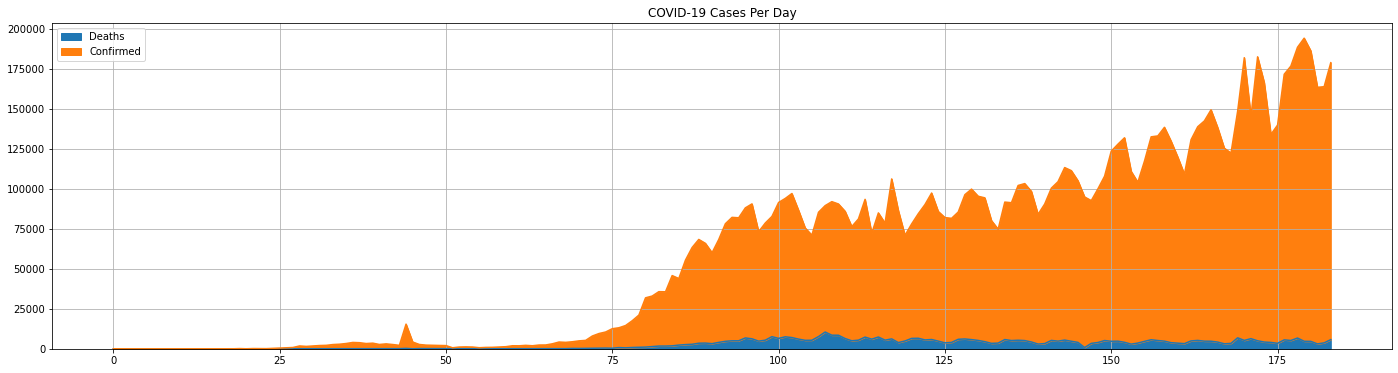

In [36]:
df_by_date[['Deaths', 'Confirmed']].plot(kind='area',
                                         title='COVID-19 Cases Per Day',
                                         grid=True,
                                         figsize=(24, 6))
plt.savefig('wcovid19dailyjunex')

In [37]:
egx = df_eg.copy()

In [38]:
egx.set_index('Date', inplace=True)
egx.sort_index(inplace=True)

In [39]:
egx.head(30)

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-01-17,0,0,Egypt,Africa
2020-01-18,0,0,Egypt,Africa
2020-01-19,0,0,Egypt,Africa
2020-01-20,0,0,Egypt,Africa
2020-01-21,0,0,Egypt,Africa
2020-01-22,0,0,Egypt,Africa
2020-01-23,0,0,Egypt,Africa
2020-01-24,0,0,Egypt,Africa
2020-01-25,0,0,Egypt,Africa


In [40]:
egx.tail()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-27,1625,87,Egypt,Africa
2020-06-28,1168,88,Egypt,Africa
2020-06-29,1265,81,Egypt,Africa
2020-06-30,1566,83,Egypt,Africa
2020-07-01,1557,81,Egypt,Africa


In [41]:
print({
    '1st. Month situation':
    egx.loc['2020-02-01':'2020-03-01'][['Confirmed', 'Deaths']].sum()
})

{'1st. Month situation': Confirmed    1
Deaths       0
dtype: int64}


In [42]:
print({
    '2nd. Month situation':
    egx.loc['2020-03-01':'2020-04-01'][['Confirmed', 'Deaths']].sum()
})

{'2nd. Month situation': Confirmed    655
Deaths        41
dtype: int64}


In [43]:
print({
    '3ed. Month situation':
    egx.loc['2020-04-01':'2020-05-01'][['Confirmed', 'Deaths']].sum()
})

{'3ed. Month situation': Confirmed    4928
Deaths        352
dtype: int64}


In [44]:
print({
    '4th. Month situation':
    egx.loc['2020-05-01':'2020-06-01'][['Confirmed', 'Deaths']].sum()
})

{'4th. Month situation': Confirmed    19717
Deaths         579
dtype: int64}


In [45]:
print({
    '5th. Month situation':
    egx.loc['2020-06-01':'2020-07-01'][['Confirmed', 'Deaths']].sum()
})

{'5th. Month situation': Confirmed    44862
Deaths        2040
dtype: int64}


In [46]:
#egx.plot(grid=True, figsize=(12, 6))
#plt.title("Egypt's Daily COVID-19 State till (Early June 27.2020)")
#plt.savefig('egycov19state_junex')

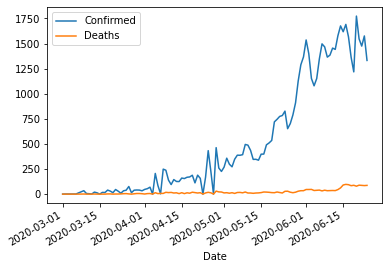

In [47]:
egx.loc['2020-03-01':'2020-06-24'][['Confirmed', 'Deaths']].plot()
plt.savefig('egycov19state_junex2')

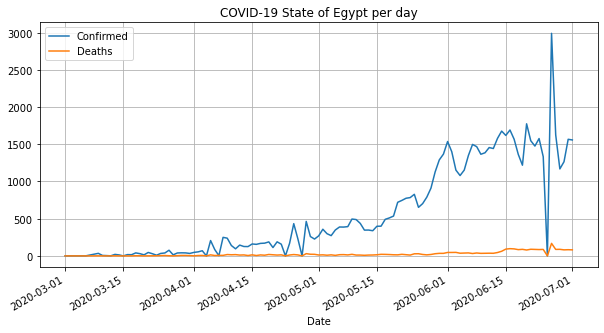

In [48]:
egx.loc['2020-03-01':'2020-07-01'][['Confirmed', 'Deaths']].plot(
    kind='line',
    title='COVID-19 State of Egypt per day',
    grid=True,
    figsize=(10, 5))
plt.savefig('egycov19state_junex2x')

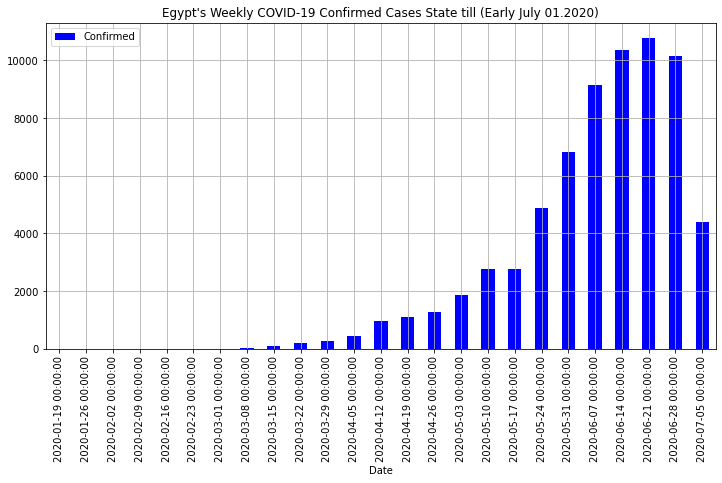

In [49]:
# Plot Confirmed Cases Weekly for Egypt
egx['Confirmed'].resample('W').sum().plot(kind='bar',
                                          color='blue',
                                          legend=True,
                                          grid=True,
                                          figsize=(12, 6))
plt.title(
    "Egypt's Weekly COVID-19 Confirmed Cases State till (Early July 01.2020)")
plt.savefig('egycov19weeklystatex')

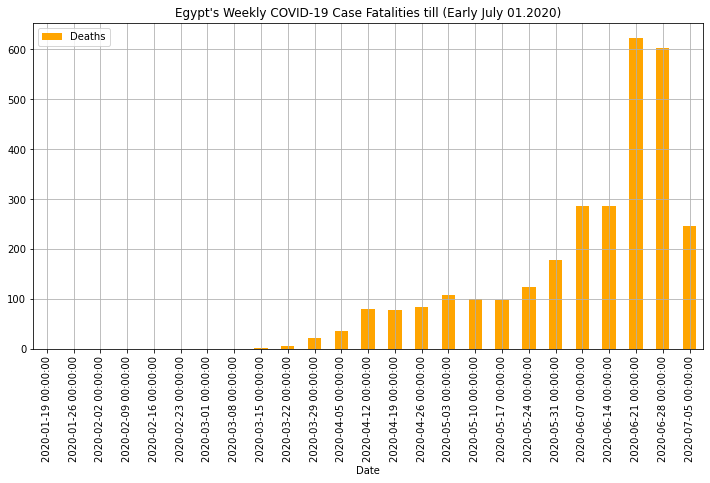

In [50]:
# Plot Fatalities Weekly for Egypt
egx['Deaths'].resample('W').sum().plot(kind='bar',
                                          color='orange',
                                          legend=True,
                                          grid=True,
                                          figsize=(12, 6))
plt.title(
    "Egypt's Weekly COVID-19 Case Fatalities till (Early July 01.2020)")
plt.savefig('egycov19weeklystatex_f')

In [51]:
# Max. No. of confirmed cases recorded per day in Egypt
# Date of Max. No. of confirmed cases recorded in Egypt
print({
    'Max. No. of Daily Records': egx['Confirmed'].max(),
    'Date of Record': egx['Confirmed'].idxmax()
})

{'Max. No. of Daily Records': 2989, 'Date of Record': Timestamp('2020-06-26 00:00:00')}


In [52]:
# Max. No. of Case Fatalities recorded per day in Egypt
# Date of Max. No. of Case Fatalities recorded in Egypt
print({
    'Max. No. of daily fatalities': egx['Deaths'].max(),
    'Date of Record': egx['Deaths'].idxmax()
})

{'Max. No. of daily fatalities': 168, 'Date of Record': Timestamp('2020-06-26 00:00:00')}


In [53]:
#largest values/daily records for Egypt
egx.nlargest(10, 'Confirmed')

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-26,2989,168,Egypt,Africa
2020-06-20,1774,79,Egypt,Africa
2020-06-16,1691,97,Egypt,Africa
2020-06-14,1676,62,Egypt,Africa
2020-06-27,1625,87,Egypt,Africa
2020-06-15,1618,91,Egypt,Africa
2020-06-13,1578,45,Egypt,Africa
2020-06-23,1576,85,Egypt,Africa
2020-06-17,1567,94,Egypt,Africa


In [54]:
egx.nlargest(10, 'Deaths')

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-26,2989,168,Egypt,Africa
2020-06-16,1691,97,Egypt,Africa
2020-06-17,1567,94,Egypt,Africa
2020-06-15,1618,91,Egypt,Africa
2020-06-21,1547,89,Egypt,Africa
2020-06-19,1218,88,Egypt,Africa
2020-06-28,1168,88,Egypt,Africa
2020-06-22,1475,87,Egypt,Africa
2020-06-24,1332,87,Egypt,Africa
